In [1]:
#Cargar las librerias necesarias

import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt 
# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.DataFrame(pd.read_csv("./Titanic-Dataset.csv"))

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio
Datos.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [4]:
# Cantidad de los datos
Datos.shape

(891, 12)

In [5]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

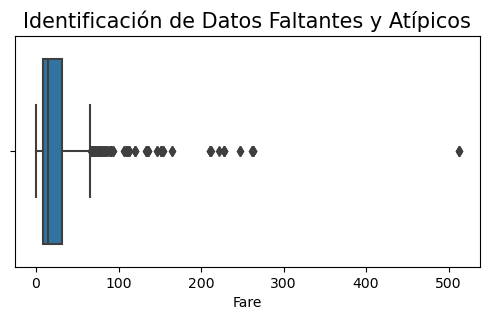

In [6]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=15 )

In [7]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en ID pasajero: ",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Sobrevivio: ",Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Primera Calse: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Nombre: ",Datos['Name'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo: ",Datos['Sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parque: ",Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Tiquete: ",Datos['Ticket'].isin([0]).sum())
print("Cantidad de Registros con cero en Tarifa: ",Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabina: ",Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarque: ",Datos['Embarked'].isin([0]).sum())


Cantidad de Registros con cero en ID pasajero:  0
Cantidad de Registros con cero en Sobrevivio:  549
Cantidad de Registros con cero en Primera Calse:  0
Cantidad de Registros con cero en Nombre:  0
Cantidad de Registros con cero en Sexo:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en SibSp:  608
Cantidad de Registros con cero en Parque:  678
Cantidad de Registros con cero en Tiquete:  0
Cantidad de Registros con cero en Tarifa:  15
Cantidad de Registros con cero en Cabina:  0
Cantidad de Registros con cero en Embarque:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

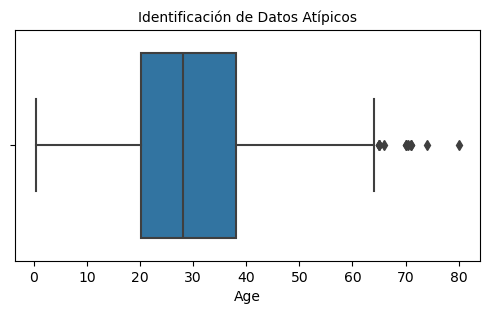

In [8]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [9]:
#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=35
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 381


In [10]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [11]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [12]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  300 non-null    int64  
 1   Survived     300 non-null    int64  
 2   Pclass       300 non-null    int64  
 3   Name         300 non-null    object 
 4   Sex          300 non-null    object 
 5   Age          300 non-null    float64
 6   SibSp        300 non-null    int64  
 7   Parch        300 non-null    int64  
 8   Ticket       300 non-null    object 
 9   Fare         300 non-null    float64
 10  Cabin        55 non-null     object 
 11  Embarked     300 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 30.5+ KB


In [13]:
# Total precio Ticket

Datos['Age'].value_counts()

Age
24.0    30
22.0    27
28.0    25
30.0    25
21.0    24
25.0    23
29.0    20
32.0    18
26.0    18
27.0    18
31.0    17
34.0    15
33.0    15
23.0    15
28.5     2
32.5     2
30.5     2
20.5     1
23.5     1
24.5     1
34.5     1
Name: count, dtype: int64

In [14]:
Datos[['Age']].head(10)

,Age
0,22.0
2,26.0
8,27.0
18,31.0
21,34.0
23,28.0
34,28.0
37,21.0
41,27.0
51,21.0


In [15]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Age',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['SibSp'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [16]:
print (Y_train)

117    1
798    0
134    0
752    0
883    0
      ..
60     0
227    0
120    2
649    0
426    1
Name: SibSp, Length: 225, dtype: int64


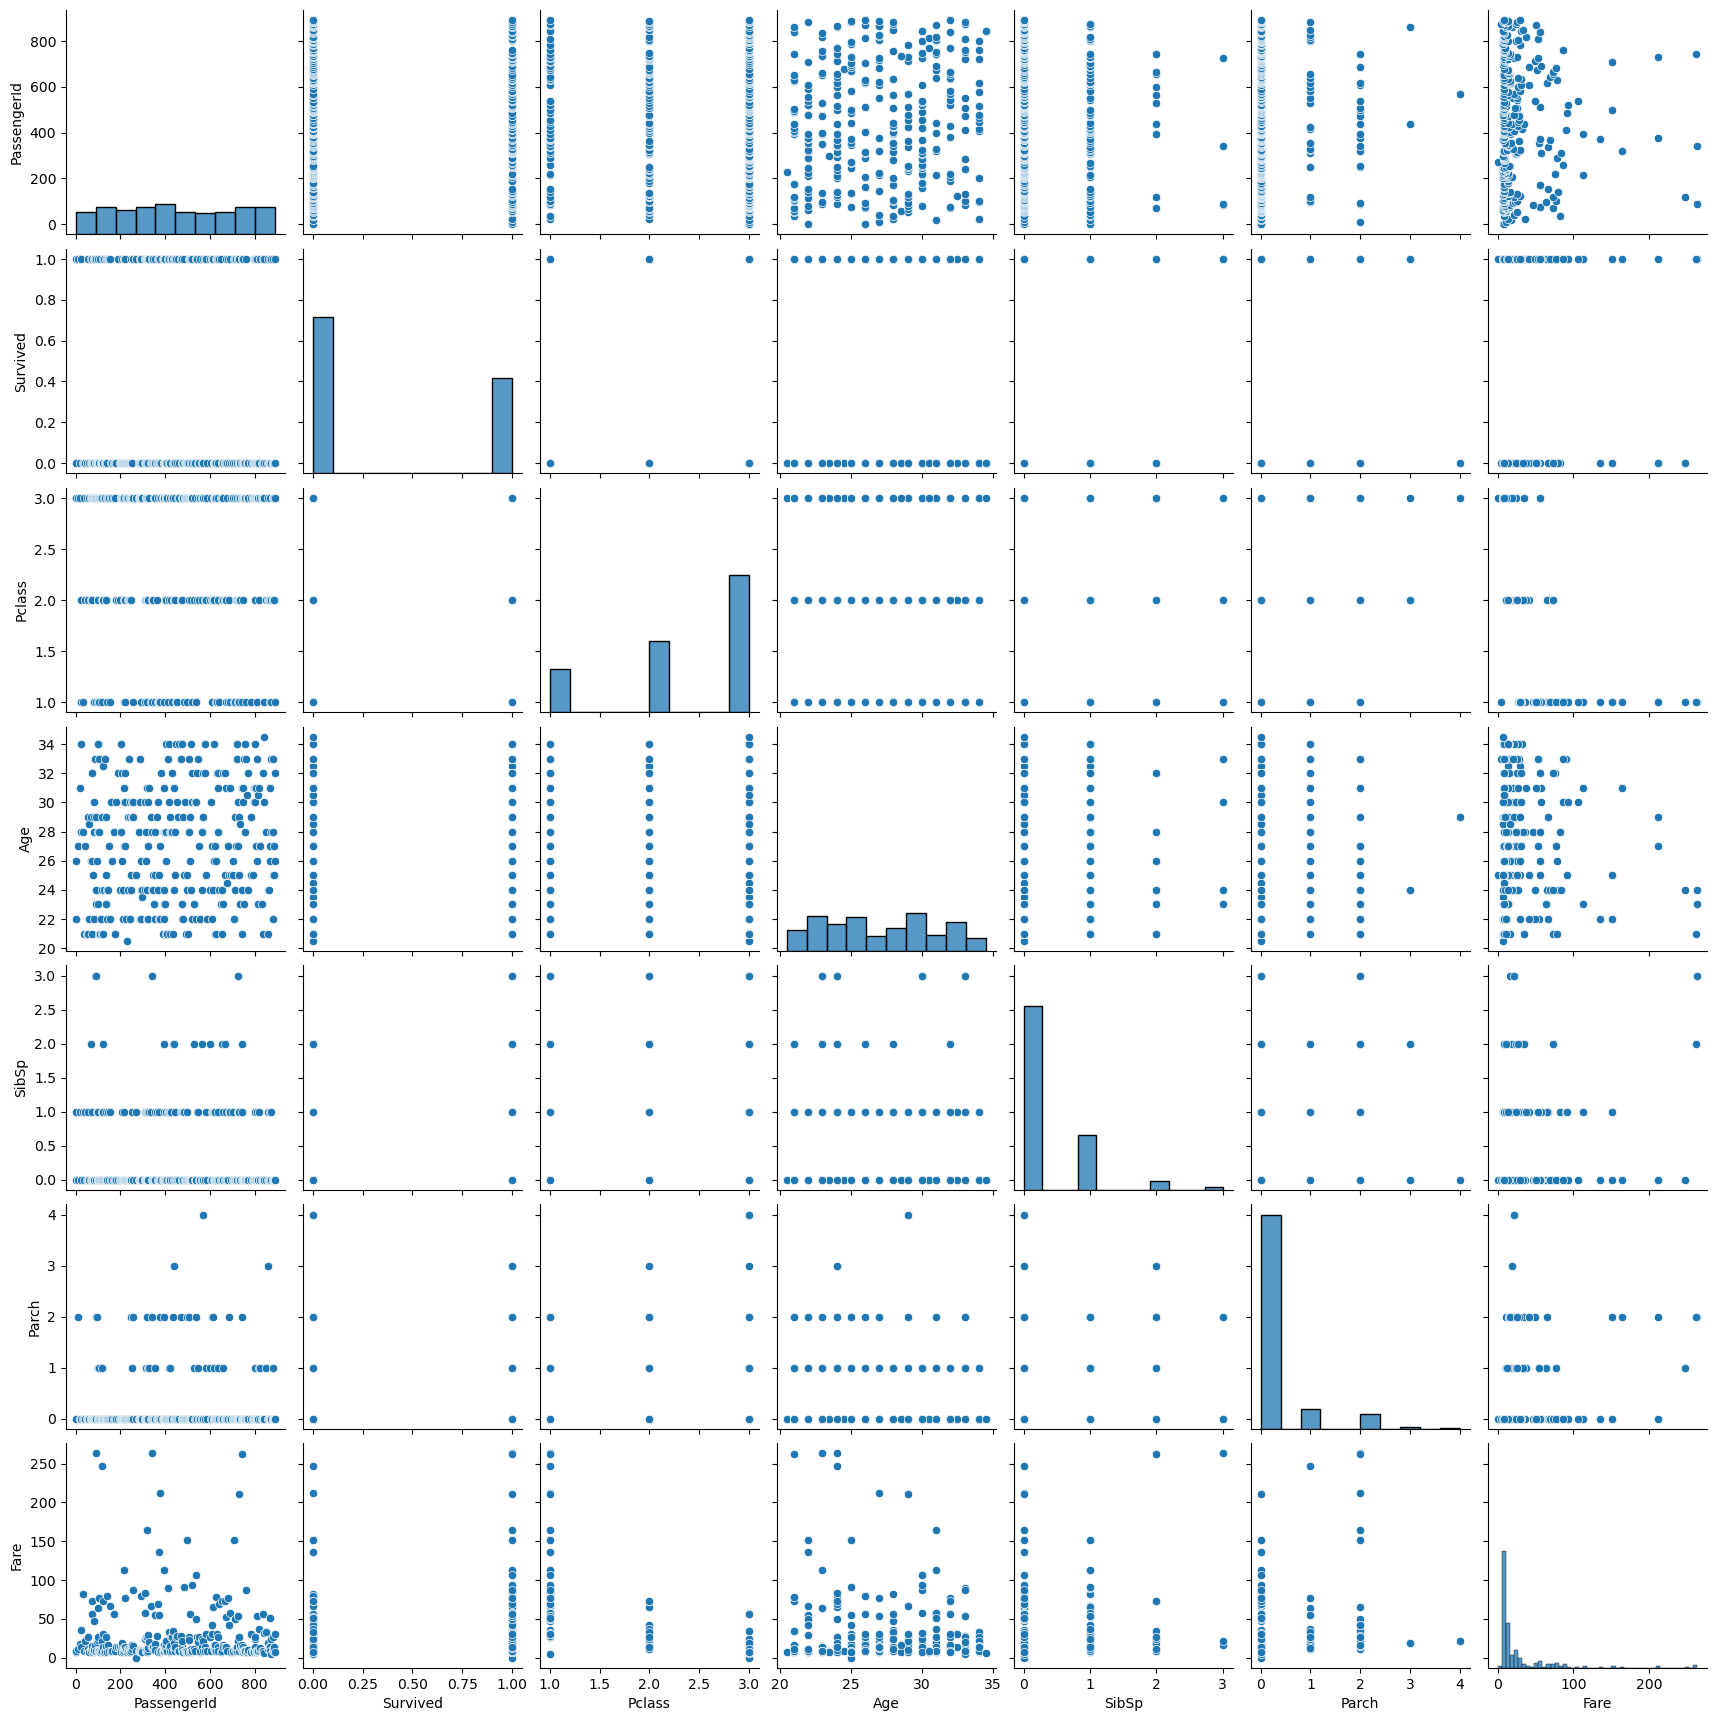

In [18]:
sns.pairplot(Datos)
plt.show()

In [19]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(Datos['Fare'])

In [20]:
# Now let's see the head of our dataframe.

Datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


In [21]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Datos, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S


In [25]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,442.180952,0.371429,2.385714,26.919048,0.304762,0.261905,25.053887
std,258.747324,0.484341,0.737762,3.941027,0.612842,0.665612,36.850454
min,1.000000,0.000000,1.000000,21.000000,0.000000,0.000000,0.000000
25%,227.500000,0.000000,2.000000,24.000000,0.000000,0.000000,7.895800
50%,407.500000,0.000000,3.000000,27.000000,0.000000,0.000000,10.825000
75%,673.500000,1.000000,3.000000,30.000000,0.000000,0.000000,26.000000
max,891.000000,1.000000,3.000000,34.000000,3.000000,4.000000,263.000000


In [26]:
x = np.array(Datos[['Age']])

In [27]:
y = Datos['Fare'].values

In [28]:
modelo = LinearRegression()

In [29]:
modelo.fit(x, y)

LinearRegression()

In [30]:
print(f"La ecuacion de la recta es: y = {modelo.intercept_} + {modelo.coef_[0]}*x")

La ecuacion de la recta es: y = 47.5807797164677 + -0.7385998293420788*x


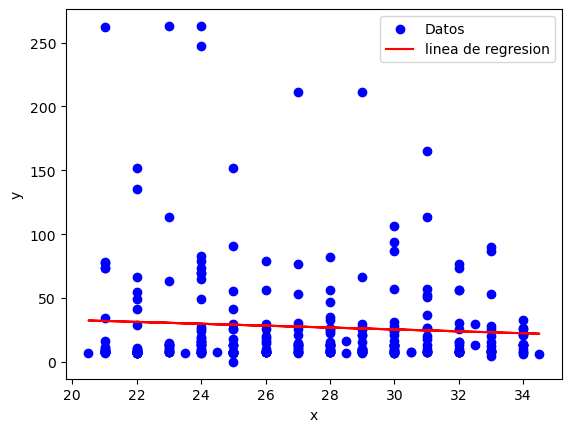

In [31]:
#graficar los datos

plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, modelo.predict(x), color='red', label='linea de regresion')
plt.rcParams['figure.figsize'] = (20, 9)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
y_pred = modelo.predict(x)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [33]:
print()
print(f" Error cuadratico medio (MSE) : {mse}")
print()
print(f" Raiz del error cuadratico medio (RMSE) : {rmse}")
print()
print(f" Error absoluto medio (MAE) : {mae}")
print()
print(f" el coeficiente de determinacion (R2) : {r2}")


 Error cuadratico medio (MSE) : 1652.2623747679875

 Raiz del error cuadratico medio (RMSE) : 40.648030392234105

 Error absoluto medio (MAE) : 24.401781127415347

 el coeficiente de determinacion (R2) : 0.0051369664506855095
